In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [ ]:
pipeline_baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv", index_col=0).rename(columns = {"Method": "method"})
pipeline_baselines.sample(5)

,csv_file,method,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
14,EnergyEfficiency.csv,Pipeline Baseline,0.966843,0.971852,0.909865,0.299274,0.167241
46,AutoMPG.csv,Pipeline Baseline,0.863282,0.898886,0.818141,0.432016,0.322135
4,AutoMPG.csv,Pipeline Baseline,0.855654,0.894404,0.850249,0.426083,0.357794
40,ConcreteCompressiveStrength.csv,Pipeline Baseline,0.911962,0.903237,0.675381,0.563519,0.307664
69,SML2010.csv,Pipeline Baseline,0.995832,0.996091,0.837241,0.400484,0.062062


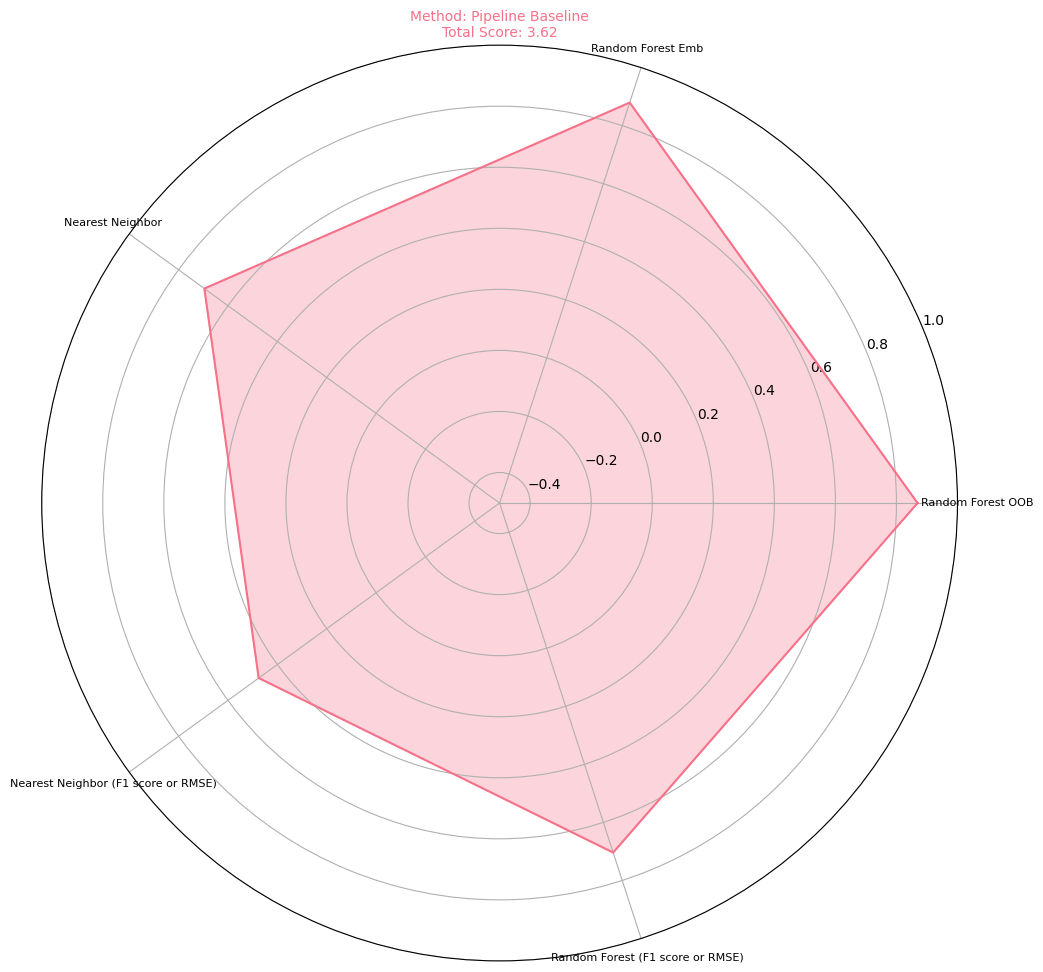

In [3]:
plot_radial(pipeline_baselines, ['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

In [ ]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines_in_sample = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataTrainTest.csv", index_col=0).rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
552,ConcreteSlumpTest,skewed,8,0.371261,0.779765
129,EnergyEfficiency,skewed,146,0.553869,0.864876
9,ComputerHardware,random,47,0.358290,0.312089
98,Hydrodynamics,skewed,58,-0.134976,0.656626
458,IstanbulStock,distort,90,0.532030,0.471374


In [5]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
try:
    baselines_grouped.drop(columns = ["Unnamed: 0"], inplace= True)
except:
    print("Didn't need to run")

baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

Didn't need to run


,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.731098,0.583344
46,Hydrodynamics,even,-0.132785,0.971827
47,Hydrodynamics,random,0.904653,-0.135059
48,Hydrodynamics,skewed,-0.134976,0.916070
49,Hydrodynamics,turn,0.731098,0.730979


<Axes: xlabel='csv_file'>

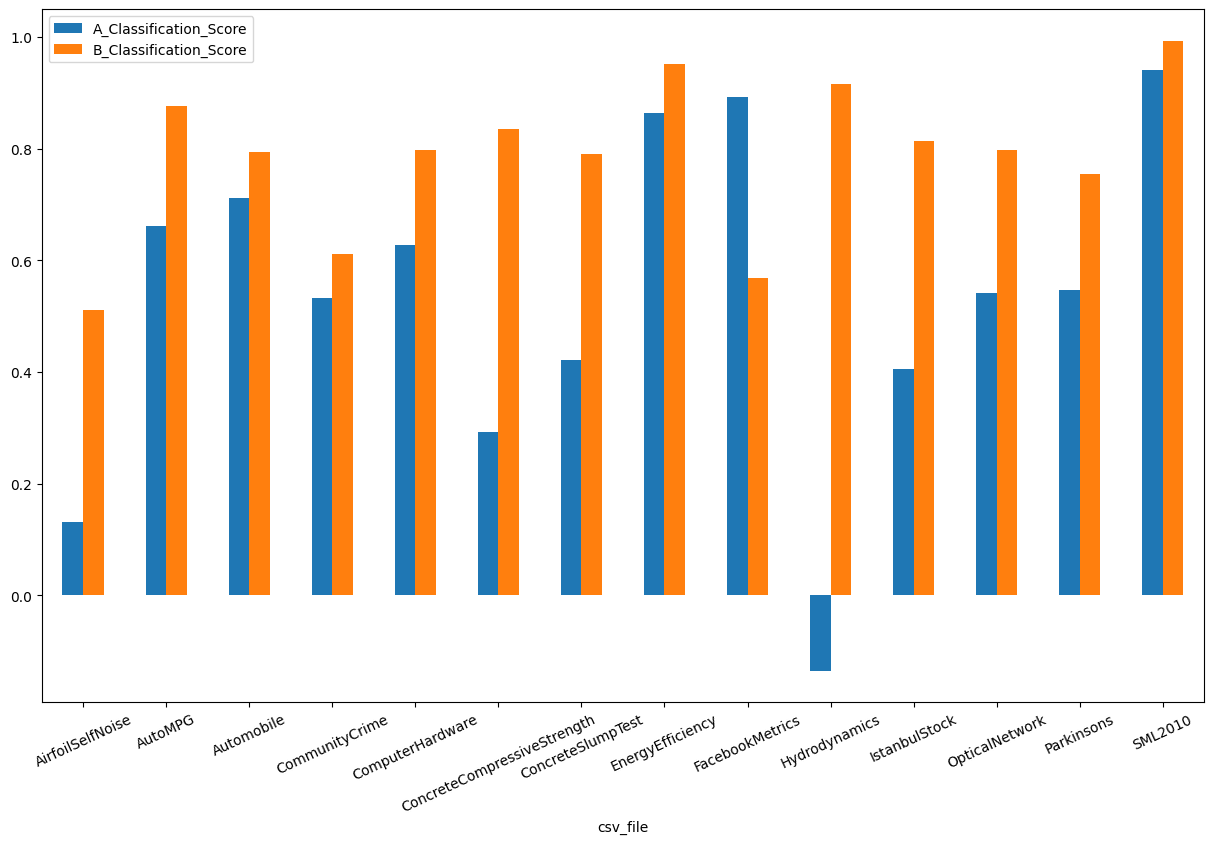

In [6]:
baselines_grouped[baselines_grouped["split"] == "skewed"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [7]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)


File Length: 1123


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
721,SPUD,Automobile,random,0.3,"{'knn': 6, 'OD_method': 'default', 'agg_method...","{'42': 0.6165935936721465, '1738': -0.95829913...","{'42': 0.00011866619200189868, '1738': 7.91107...","{'42': 0.7392255979588731, '1738': 0.326323680...","{'42': 0.7179772036126282, '1738': 0.215596307...","{'42': 0.5265828412316766, '1738': 0.150658685...","{'42': 0.4937959485992804, '1738': 0.873599523...","{'42': 0.38112517107744526, '1738': 0.83953939...","{'42': {'RF-OOB': 0.7673189858413803, 'KNN': 0...","{'knn': 0.1817245935081697, 'OD_method': 0.193..."
772,NAMA,IstanbulStock,even,0.3,"{'OD_method': 'absolute_distance', 'agg_method...",{'42': 0.0675805359367242},{'42': 0.0},{'42': 0.44618823755935766},{'42': 0.5198394314966739},{'42': 0.46728287092064547},{'42': 0.8165060019628724},{'42': 0.7751831017402196},"{'42': {'RF-OOB': 0.3924280780080961, 'KNN': 0...","{'OD_method': 0.07077386606974984, 'agg_method..."
855,RF-NAMA,Parkinsons,random,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.2340972791776701, '1738': -0.2259914...","{'42': 7.576278859212315e-05, '1738': 8.164418...","{'42': -0.11099921322363016, '1738': -0.094228...","{'42': -0.08708208174621102, '1738': -0.087646...","{'42': 0.0044852123131123856, '1738': -0.00197...","{'42': 0.9833798411080589, '1738': 1.008717892...","{'42': 1.027610686703809, '1738': 1.0509567017...","{'42': {'RF-OOB': -0.0959766831463118, 'KNN': ...",{}
564,SPUD,AutoMPG,turn,0.3,"{'knn': 42, 'OD_method': 'default', 'agg_metho...","{'42': 0.4068910534294241, '1738': 0.406891053...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.8106986658466607, '1738': 0.810015212...","{'42': 0.8136315065883462, '1738': 0.774246134...","{'42': 0.7704527033083384, '1738': 0.702751966...","{'42': 0.4385514805482458, '1738': 0.490449808...","{'42': 0.3951579624772324, '1738': 0.427417866...","{'42': {'RF-OOB': 0.7893711592665856, 'KNN': 0...","{'knn': 0.375804115746009, 'OD_method': 0.1757..."
507,DTA,AutoMPG,distort,0.3,"{'knn': 50, 'distances': 'DPT'}","{'42': 0.9106931986240429, '1738': 0.899425335...","{'42': 0.013590344332467452, '1738': 0.0117337...","{'42': 0.8955956765003937, '1738': 0.494963099...","{'42': 0.8815050520881285, '1738': 0.522456974...","{'42': 0.8565306689984202, '1738': 0.613289661...","{'42': 0.34535166604461137, '1738': 0.67200467...","{'42': 0.31385708443672417, '1738': 0.74676792...","{'42': {'RF-OOB': 0.9155614209858868, 'KNN': 0...",{}


In [8]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [9]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
60,RF-SPUD,ComputerHardware,distort,0.3,0.641705,0.000000,0.667248,0.463233,0.390725,0.783336,0.779479,"{'42': {'RF-OOB': 0.45801369543891535, 'KNN': ...",0.641705,0.750700,0.781821
36,JLMA,ComputerHardware,skewed,0.3,0.509676,0.331677,0.577775,0.667979,0.526190,0.965653,0.808354,"{'42': {'RF-OOB': 0.544431872818915, 'KNN': 0....",0.177999,0.627476,0.796896
42,NAMA,ComputerHardware,skewed,0.3,-0.115030,0.002541,0.605311,0.673944,0.557621,0.933074,0.801060,"{'42': {'RF-OOB': 0.6437226795203912, 'KNN': 0...",-0.117571,0.627476,0.796896


In [ ]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB", return_df=True).head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,AirfoilSelfNoise,0.619399,0.431465,0.700234,0.769754,NaN,NaN,0.818670,0.284405,-0.095231,0.675820,0.822892,NaN,-0.076214,-0.039089,0.119716,0.914960,0.920161
1,AutoMPG,0.674557,0.831094,0.735398,0.844954,NaN,NaN,0.884040,0.839507,0.039760,0.768650,0.886674,NaN,-0.022647,0.756940,0.817740,0.875136,0.876258
2,Automobile,0.502089,0.735603,0.753711,0.780318,NaN,NaN,NaN,0.773912,0.299653,0.766941,0.811098,NaN,-0.004982,0.662132,0.848424,0.749043,0.809653
3,CommunityCrime,0.261016,0.583580,0.689580,0.596364,NaN,NaN,0.662436,0.075647,-0.064281,0.534992,0.683720,0.670108,-0.055358,0.005141,0.620322,0.611469,0.611469
4,ComputerHardware,0.709996,0.709258,0.728898,0.751473,NaN,NaN,0.785939,0.685430,0.113527,0.764483,0.850338,0.835081,-0.163262,0.668598,0.667248,0.921808,0.796896
5,ConcreteCompressiveStrength,0.615152,0.690816,0.667305,0.719073,NaN,NaN,NaN,0.640412,-0.050283,0.640575,0.812925,NaN,-0.086917,-0.023892,0.437609,0.817377,0.835217
6,ConcreteSlumpTest,0.549525,0.549586,0.629340,0.682349,NaN,NaN,0.771069,0.473491,0.396304,0.531518,0.886699,0.826322,-0.077662,0.800048,0.736710,0.807941,0.856885
7,EnergyEfficiency,0.788884,0.879697,0.904498,0.897938,NaN,NaN,0.945310,0.922158,-0.038505,0.935956,0.916077,0.961842,-0.079072,0.227371,0.894403,0.941495,0.951397
8,FacebookMetrics,0.752303,0.336870,0.727294,0.750302,NaN,NaN,0.728243,0.481856,-0.095869,0.720300,0.464518,0.480651,-0.160206,0.140455,0.457261,0.893248,0.806380
9,Hydrodynamics,0.821178,0.748517,0.698600,0.836765,NaN,NaN,0.942376,0.238124,0.151480,0.635655,0.864102,0.936298,-0.146696,0.636120,0.921095,0.904653,0.971827


<Axes: >

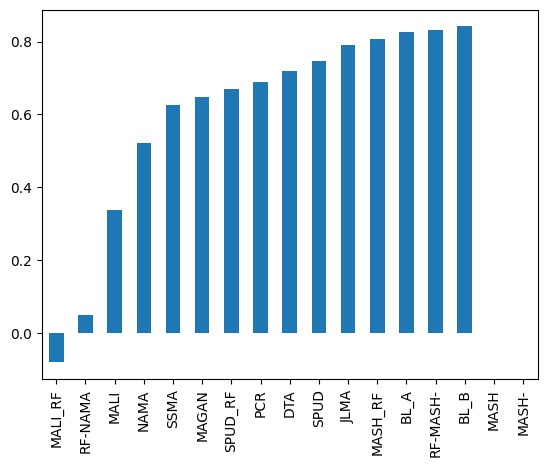

In [11]:
# Visualization
results_df.drop(columns=["csv_file"]).mean(axis = 0).sort_values().plot(kind="bar")

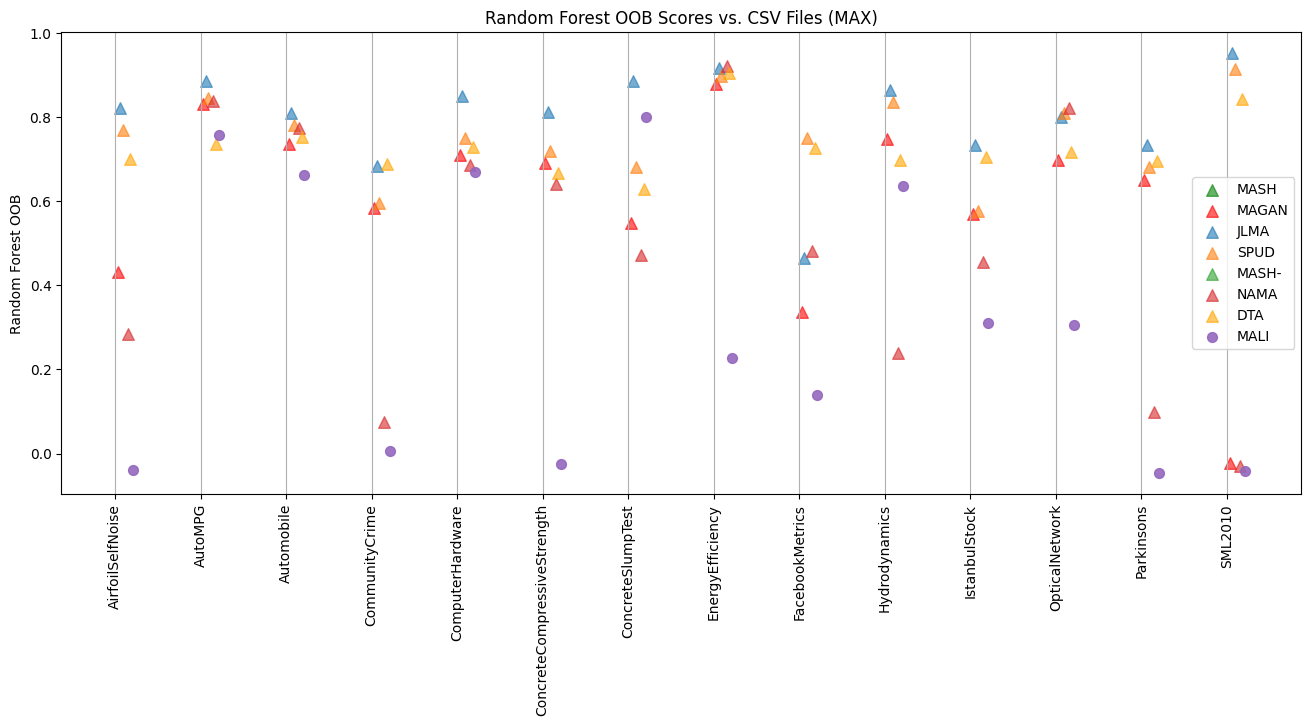

In [12]:
plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB",
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [13]:
proc_reg_df["method"].nunique()

13

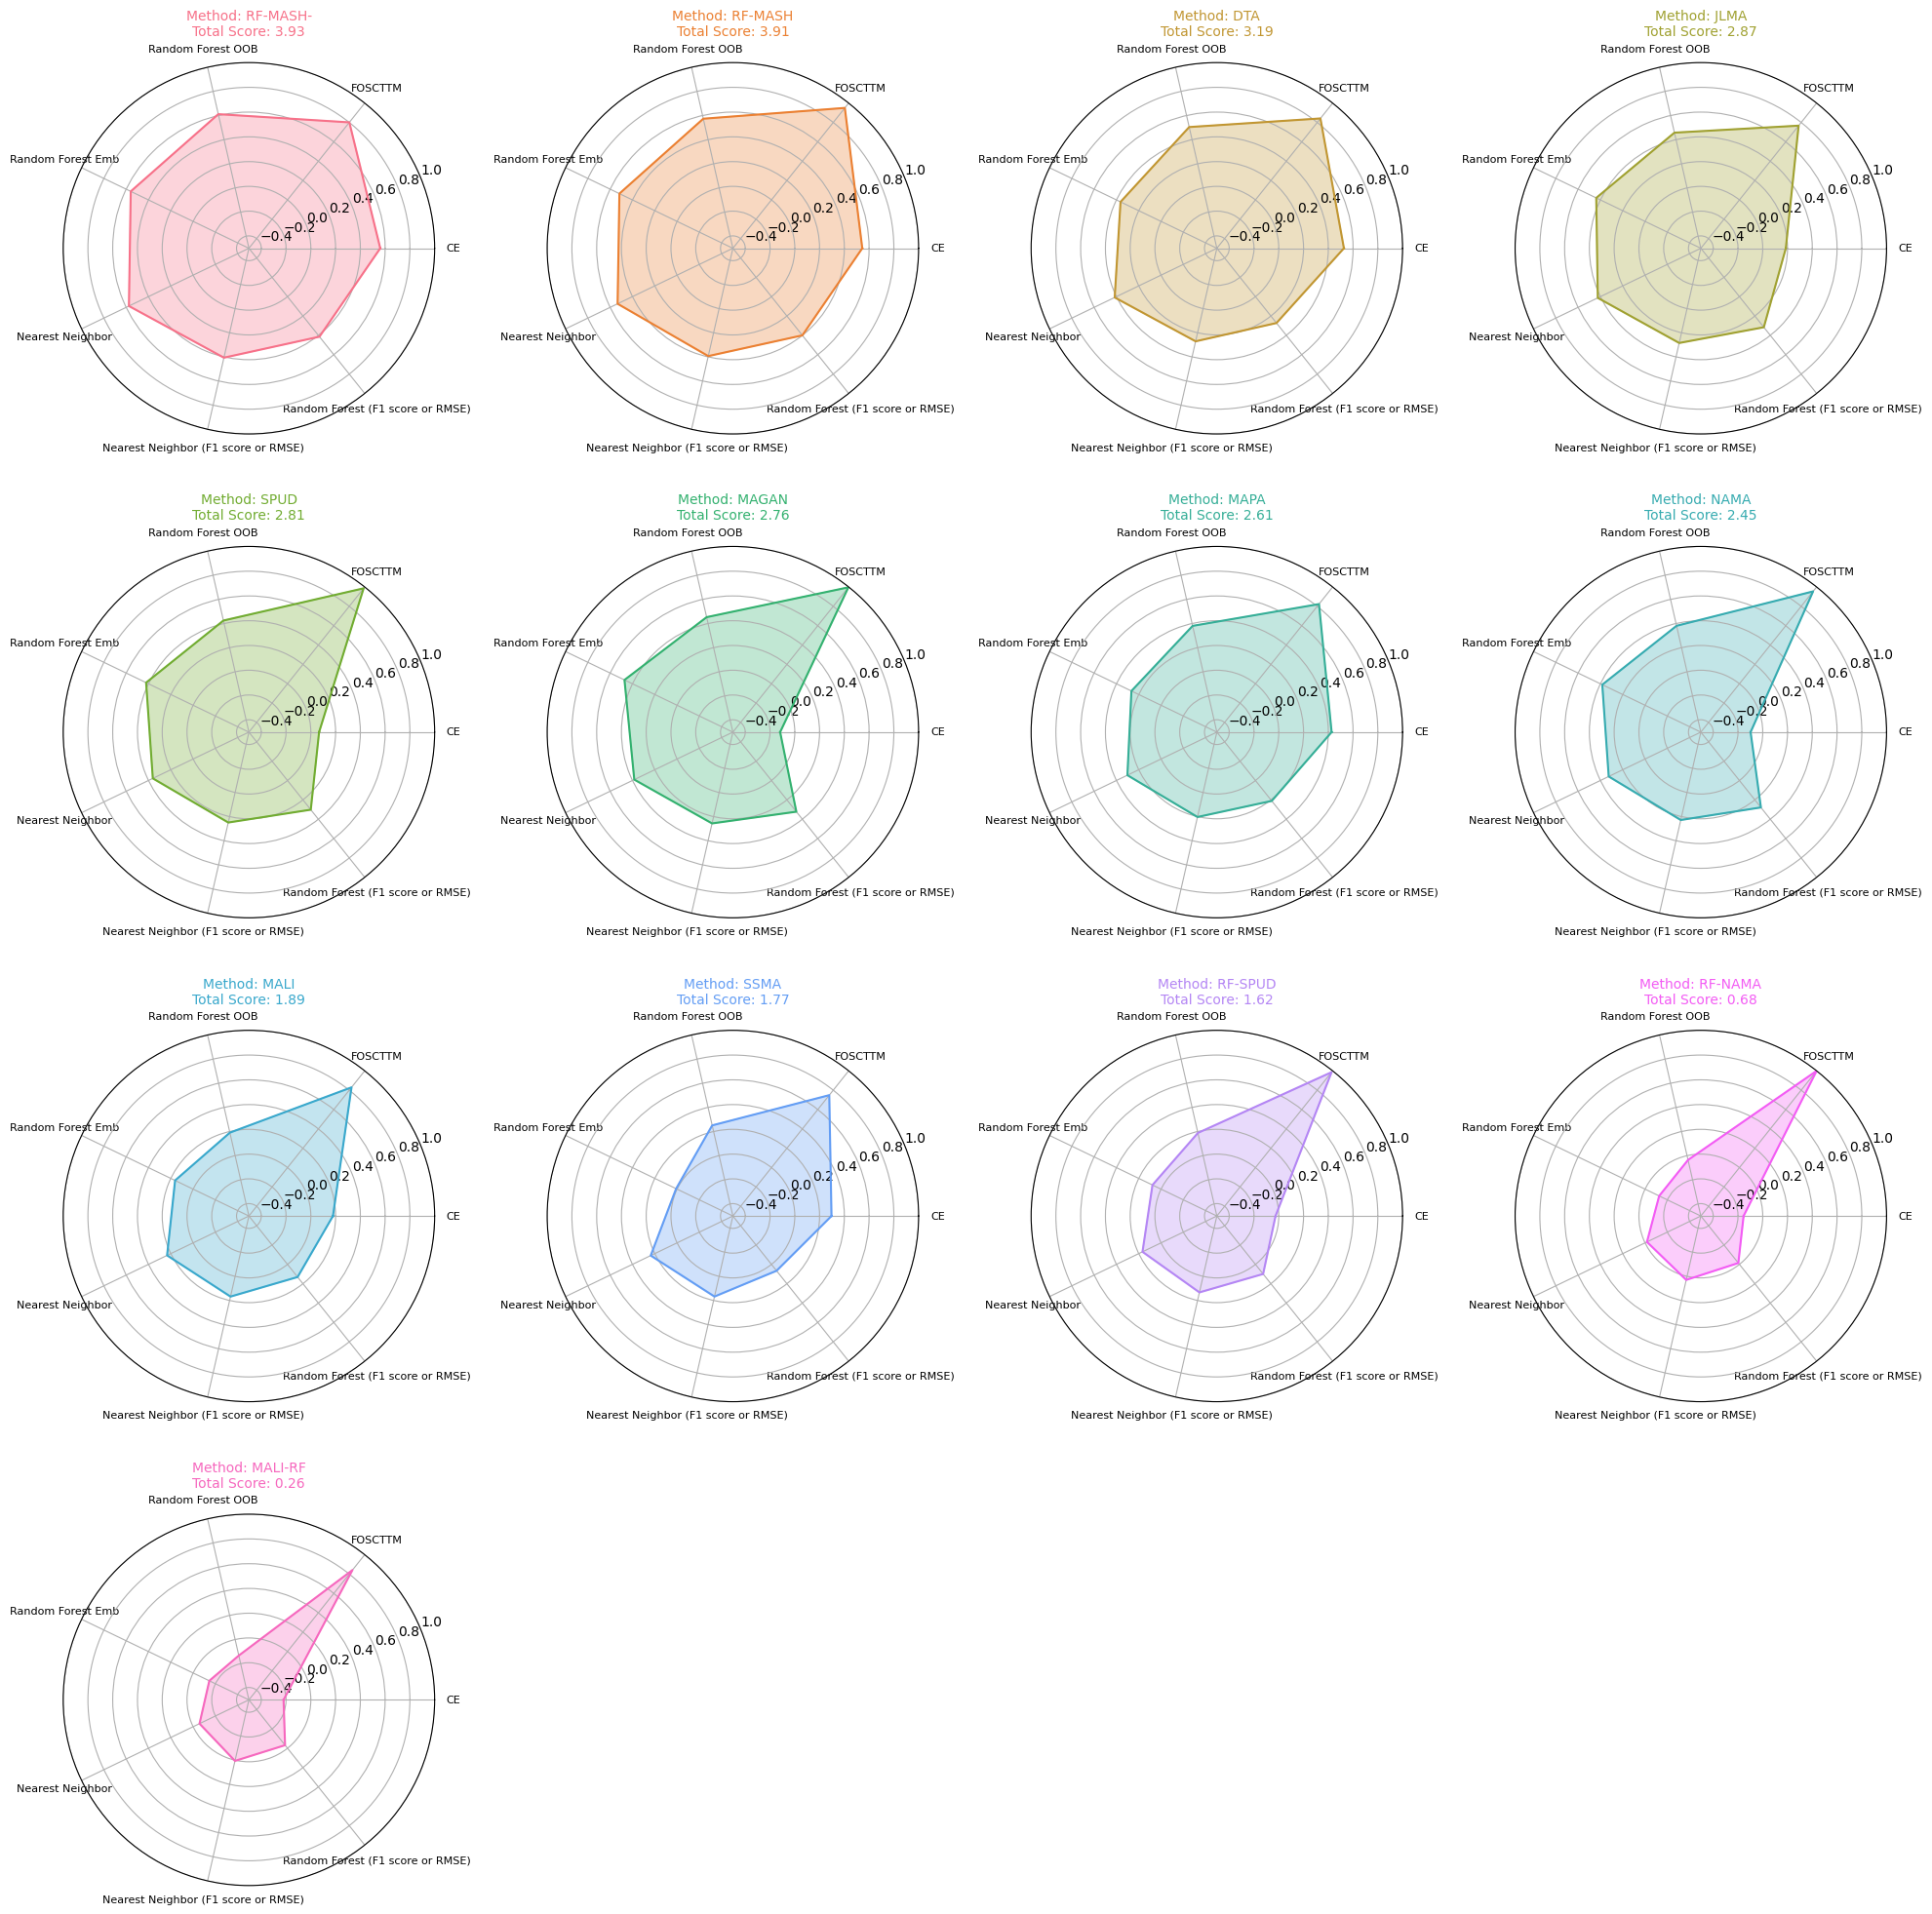

In [14]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [15]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
712,RF-SPUD,Automobile,random,0.3,0.146124,0.000000,0.307076,0.317732,0.328637,0.759609,0.759074,"{'42': {'RF-OOB': 0.24104004395667866, 'KNN': ...",0.146124,0.727162,0.558295
627,SPUD,FacebookMetrics,distort,0.3,-0.258390,0.027124,-0.147394,-0.250715,-0.084969,0.758542,0.808399,"{'42': {'RF-OOB': -0.05085289120531988, 'KNN':...",-0.285513,0.771436,0.806380


In [ ]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
224,0.884416,0.343988,0.900272,0.880675,0.319463
700,0.773308,0.341699,0.735171,0.722663,0.369325


In [ ]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
1063,SPUD,AirfoilSelfNoise,distort,0.3,-0.178012,0.093730,-0.067747,-0.075807,-0.011907,0.991305,1.021535,-0.271742,0.914960,0.714504,0.019321,1.016037,-0.014318,-0.081141,1.033291
638,RF-SPUD,FacebookMetrics,distort,0.3,0.462815,0.000082,0.427172,0.720569,0.715308,0.379399,0.387809,0.462733,0.771436,0.806380,0.803965,0.336332,0.730801,0.545899,0.398165


In [18]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

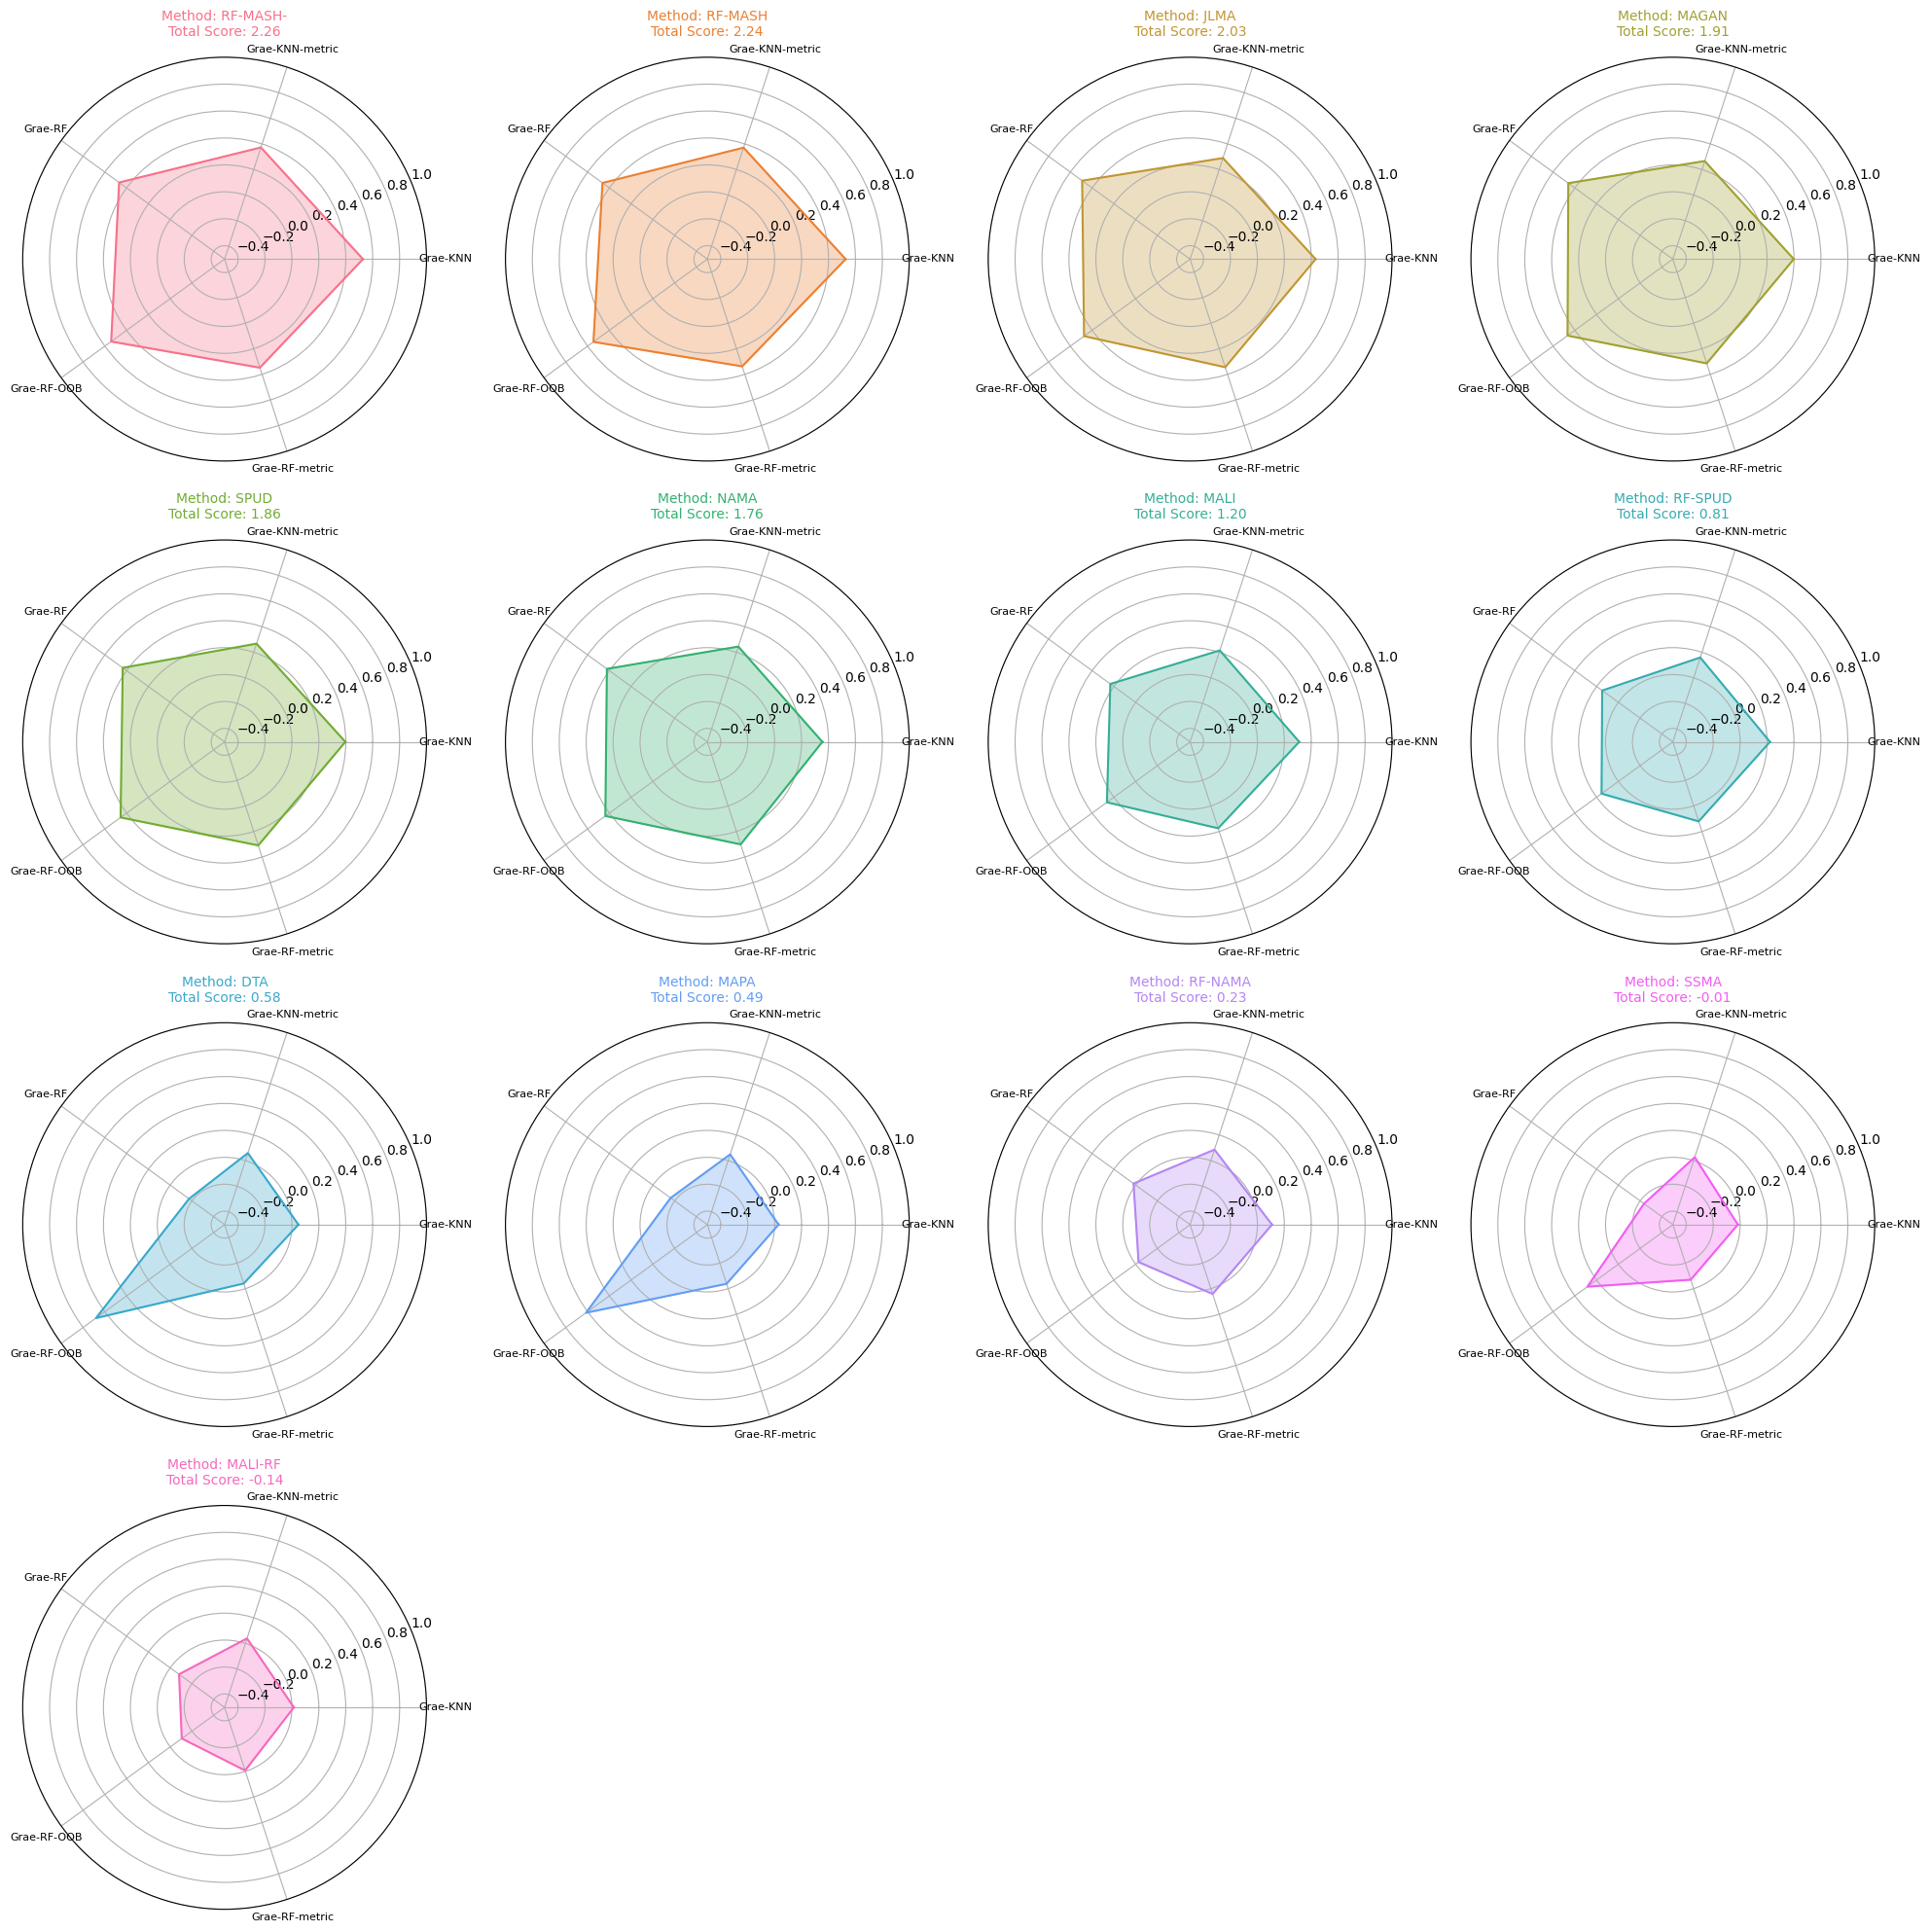

In [19]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [20]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
1054,JLMA,AirfoilSelfNoise,even,0.3,-0.169989,0.553939,0.382113,0.379370,0.139209,0.951913,0.808285,-0.723928,0.460536,0.236131,0.169915,0.934780,0.316690,0.379026,0.848120
295,SPUD,CommunityCrime,skewed,0.3,-0.124769,0.000000,0.575716,0.585943,0.539170,0.637663,0.604437,-0.124769,0.533167,0.610434,0.525221,0.647242,0.562795,0.569492,0.621102


In [ ]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.526154,0.158615,0.504363,0.363444,0.415754,0.728815,0.727622,0.367539,0.048444,0.941068,-0.173486,0.681460,1.040180
JLMA,0.186421,0.233162,0.457888,0.437567,0.423654,0.715125,0.683981,-0.046741,0.432510,0.710533,0.491310,0.473705,0.655668
MAGAN,-0.118300,0.003965,0.452572,0.471638,0.383893,0.743620,0.677896,-0.122265,0.398445,0.733898,0.460010,0.466873,0.685366
MALI,0.178812,0.170847,0.190649,0.161692,0.233467,0.832154,0.869305,0.007964,0.310919,0.785421,0.232252,0.263916,0.824874
MALI-RF,-0.220123,0.158884,-0.132888,-0.145124,-0.057266,0.994242,1.031648,-0.379007,0.014820,0.961203,-0.081615,-0.106606,1.007045
MAPA,0.426809,0.177010,0.380295,0.265833,0.301906,0.796659,0.789241,0.249799,0.029179,0.951236,-0.162821,0.614079,1.037673
NAMA,-0.098088,0.045877,0.380997,0.383521,0.325752,0.771800,0.721855,-0.143965,0.354679,0.755690,0.422478,0.436465,0.699235
RF-MASH,0.545044,0.049926,0.573460,0.517220,0.533446,0.606515,0.600136,0.495118,0.527388,0.629444,0.462969,0.546151,0.662138
RF-MASH-,0.560886,0.199102,0.611197,0.559081,0.575517,0.593352,0.586289,0.361783,0.527823,0.627683,0.468459,0.541769,0.651798


In [22]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'NAMA', 'RF-MASH',
        'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [23]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [ ]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df["Nearest Neighbor (F1 score or RMSE)"] = diff_df["Nearest Neighbor (F1 score or RMSE)"] * -1
diff_df["Random Forest (F1 score or RMSE)"] = diff_df["Random Forest (F1 score or RMSE)"] * -1 #To ensure that they are consistent on same side.

diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.455920,-0.577624,0.589240,-0.047354,0.312557
JLMA,0.025378,-0.272966,-0.067656,-0.241420,-0.028313
MAGAN,0.054127,-0.262260,-0.076117,-0.276747,0.007470
MALI,-0.120270,-0.623730,0.001216,-0.568238,-0.044431
MALI-RF,-0.147707,-1.106327,0.024349,-1.100848,-0.024603
MAPA,0.351116,-0.685403,0.464726,-0.182580,0.248432
NAMA,0.026318,-0.372168,-0.096726,-0.335334,-0.022620
RF-MASH,0.046072,-0.112224,0.070477,-0.060364,0.062003
RF-MASH-,0.083374,-0.068602,0.107058,-0.051583,0.065509


<Axes: xlabel='method'>

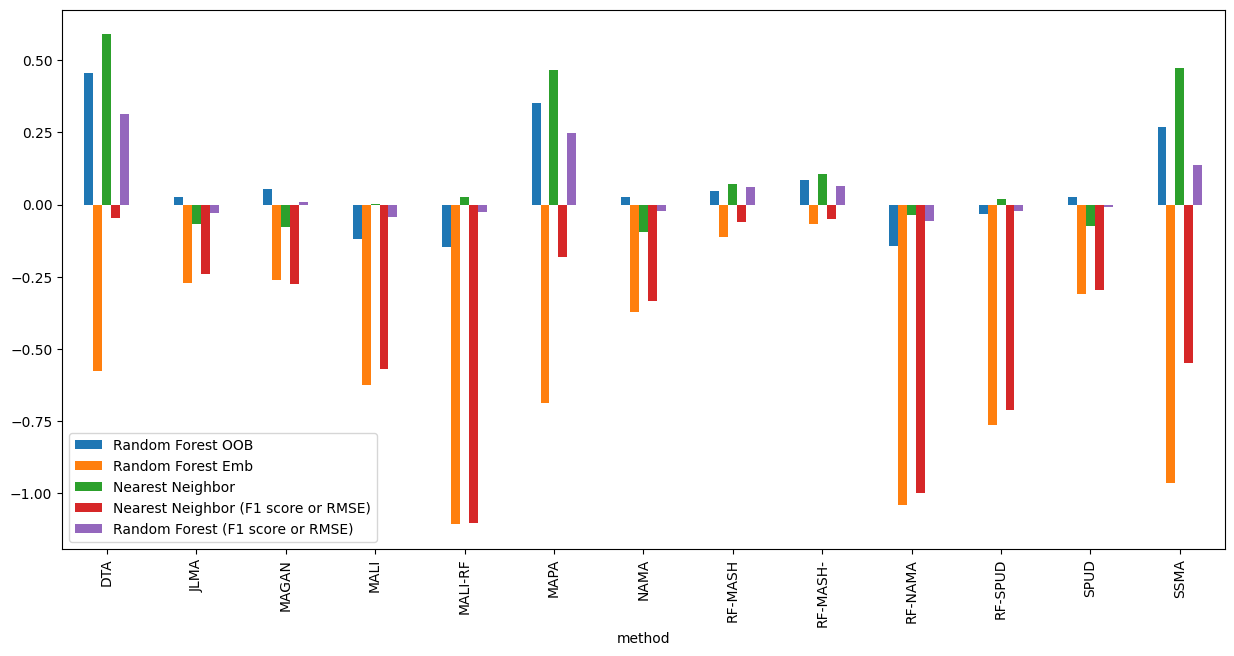

In [25]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
Also note that the RMSE is multiplied by -1 so that the bar is on the side where the method is more favorable for it
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [26]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
875,SSMA,Parkinsons,distort,0.3,"{'knn': 1064, 'Uincluded': False, 'Dincluded':...",0.168817,0.187664,"{'42': 0.20708477502362022, '1738': -0.0306105...","{'42': 0.23481910008996765, '1738': 0.03615246...","{'42': 0.4135986048933804, '1738': 0.219457522...","{'42': 0.7751345387149976, '1738': 0.908680774...","{'42': 0.8854451261498749, '1738': 1.009757853...","{'42': {'RF-OOB': 0.02821535689489596, 'KNN': ...",{},-0.018847
71,RF-SPUD,ComputerHardware,turn,0.3,"{'knn': 7, 'OD_method': 'default', 'agg_method...",0.566563,0.000027,"{'42': 0.7825299767173041, '1738': 0.558191662...","{'42': 0.5380976352078455, '1738': 0.136766220...","{'42': 0.43593331962015147, '1738': 0.01622300...","{'42': 1.0536207321043458, '1738': 0.605605169...","{'42': 0.9534417763849142, '1738': 0.567290427...","{'42': {'RF-OOB': 0.45129696123905894, 'KNN': ...",{},0.566536


### Spud Parameters on STD

In [27]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.293544,0.106728,0.328006
1,0.315521,0.136929,0.113630
2,0.299420,0.038904,0.179496
3,0.257186,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
205,0.303843,0.137920,0.086527
206,0.245030,0.052678,0.133933
207,0.589315,0.178530,0.034385
208,0.222530,0.223938,0.006242


<Axes: >

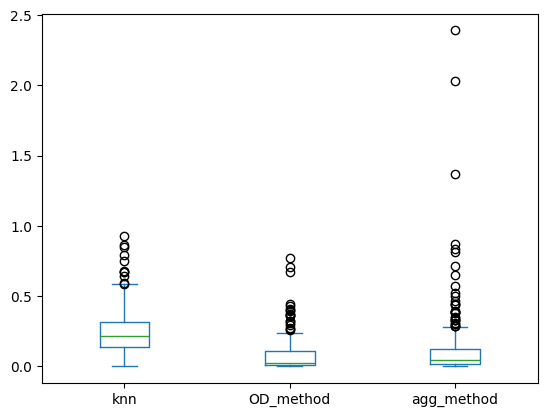

In [28]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [29]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

""


In [30]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

TypeError: no numeric data to plot

In [31]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000e+00
2,0.000000,0.000000,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.034208,0.022954,1.110223e-16
5,0.000000,0.000000,0.000000e+00
6,0.006181,0.032061,0.000000e+00
7,0.000000,0.000000,1.387779e-17
8,0.000000,0.000000,0.000000e+00
9,0.000000,0.000000,1.110223e-16


<Axes: >

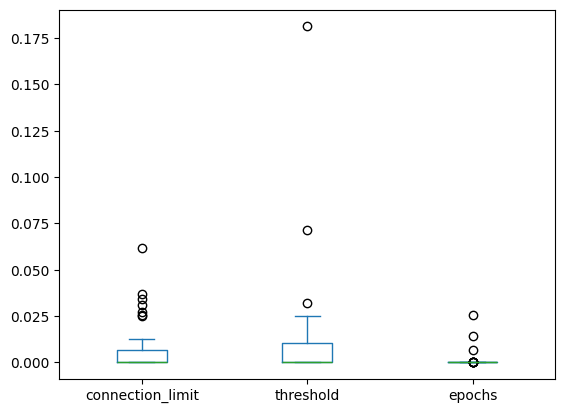

In [ ]:
mash_param_df.plot(kind = "box") 